In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
path = 'C:/Users/linab/hawaii.sqlite'
engine = create_engine(f"sqlite:///{path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
m_first_row = session.query(Measurement).first()
m_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21b3938ecd0>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [10]:
s_first_row = session.query(Station).first()
s_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21b39361280>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [11]:
recent_m = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_m)

('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#recent12_m = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
recent12_m = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(12).all()
print(recent12_m)

[('2017-08-23',), ('2017-08-23',), ('2017-08-23',), ('2017-08-23',), ('2017-08-22',), ('2017-08-22',), ('2017-08-22',), ('2017-08-21',), ('2017-08-21',), ('2017-08-21',), ('2017-08-21',), ('2017-08-20',)]


In [27]:
# Calculate the date one year from the last date in data set.
oneyago = dt.date(2017, 8,23) - dt.timedelta(days=365)
oneyago

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
for prcp in session.query(Measurement.date,Measurement.prcp).limit(15).all():
    print(prcp)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)


In [15]:
top15dateprcp = session.query(Measurement.date,Measurement.prcp).limit(15).all()
top15dateprcp

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0)]

In [28]:
dateprcp = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= oneyago).all()
dateprcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(dateprcp, columns =["Date", "PRCP Score"])
df = df.sort_values('Date')
df= df.reset_index()
#df.set_index('Date', inplace=True)
df

,index,Date,PRCP Score
0,0,2016-08-23,0.00
1,1009,2016-08-23,NaN
2,1529,2016-08-23,1.79
3,704,2016-08-23,0.05
4,361,2016-08-23,0.15
...,...,...,...
2225,1527,2017-08-22,0.00
2226,1008,2017-08-23,0.00
2227,360,2017-08-23,0.00
2228,1528,2017-08-23,0.08


In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,PRCP Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


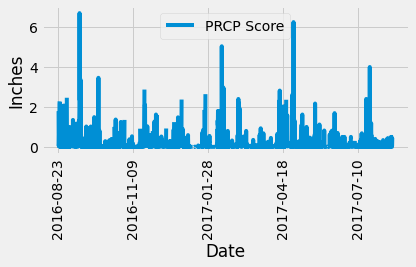

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x='Date', y='PRCP Score', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stationct=session.query(Measurement.date,Measurement.station,Measurement.tobs).all()
stationdf = pd.DataFrame(stationct, columns=['Date', 'Station', 'tobs'])
station_active = stationdf['Station'].value_counts()
station_active


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Station, dtype: int64

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_stationdf = stationdf.loc[stationdf['Station']=='USC00519281']
most_stationdf.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.date, 
       func.avg(Measurement.tobs)]

aug_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "08").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
jul_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "07").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
jun_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
may_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "05").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
apr_ave= session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "04").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
mar_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "03").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
feb_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "02").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
jan_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "01").filter(func.strftime("%Y", Measurement.date) == '2017').filter(Measurement.station == 'USC00519281').all()
dec_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12").filter(func.strftime("%Y", Measurement.date) == '2016').filter(Measurement.station == 'USC00519281').all()
nov_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "11").filter(func.strftime("%Y", Measurement.date) == '2016').filter(Measurement.station == 'USC00519281').all()
oct_ave = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "10").filter(func.strftime("%Y", Measurement.date) == '2016').filter(Measurement.station == 'USC00519281').all()
sep_ave= session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "09").filter(func.strftime("%Y", Measurement.date) == '2016').filter(Measurement.station == 'USC00519281').all()




In [25]:
big_list = [[aug_ave],
            [jul_ave],
            [jun_ave]
           ]
teststack = pd.DataFrame(columns=['Tob'], data=big_list)
#teststack



Text(0.5, -1.340000000000014, 'Temperature')

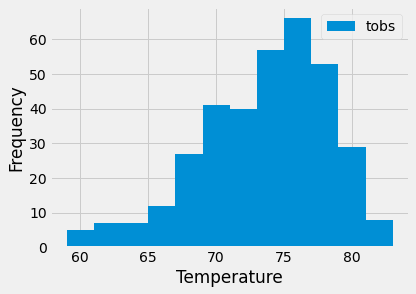

In [45]:
stationoneytemp = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= oneyago).all()
df = pd.DataFrame(stationoneytemp, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close session

In [46]:
# Close Session
session.close()